In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

# Augmented Dickey Fuller Test

In [32]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series.dropna())
    labels=["ADF test statistic","p-value","#lags used","# observations"]
    out=pd.Series(result[0:4],index=labels)
    #for key,val in result{4}.items():
    #out {f'critical value{{key}}'}=val
    if result[1]<=0.05:
        print("Reject the Null Hypothesis")
        print("Data is Sattionary")
    else:
        print("Fail to reject the Null Hypothesis")
        print("Data is Non-Sattionary")
        

In [24]:
df2=pd.read_csv("INVCMRMT (1).csv",index_col="DATE",parse_dates=True)
df2.index.freq="MS"
df2

,INVCMRMT
DATE,
1997-01-01,1301161.0
1997-02-01,1307080.0
1997-03-01,1303978.0
1997-04-01,1319740.0
1997-05-01,1327294.0
...,...
2020-03-01,2192351.0
2020-04-01,2178236.0
2020-05-01,2144828.0


# EDA


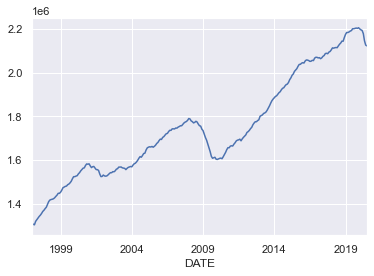

In [28]:
df2["INVCMRMT"].plot()
plt.show()

# Run an ETS Decomposition(optional)

In [26]:
#from stats models.tsa.seasonal import seasonal_decompose

#result=seasonal_decompose(df2["INVCMRMT"],model="additive") #model="add"also works
#result.plot()

# Check Stationarity using Dickey-Fuller Test

In [33]:
adf_test(df2["INVCMRMT"])

Fail to reject the Null Hypothesis
Data is Non-Sattionary


In [41]:
from statsmodels.tsa.statespace.tools import diff
df2["d1"]=diff(df2["INVCMRMT"],k_diff=1)
adf_test(df2["d1"])

Reject the Null Hypothesis
Data is Sattionary


In [42]:
len(df2)

283

In [43]:
train=df2.iloc[:252]
test=df2.iloc[252:]

# Fit an ARIMA(1,1,1) Model

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
model=ARIMA(train["INVCMRMT"],order=(1,1,1))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.INVCMRMT   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2485.905
Method:                       css-mle   S.D. of innovations           4835.548
Date:                Wed, 06 Sep 2023   AIC                           4979.810
Time:                        16:15:01   BIC                           4993.912
Sample:                    02-01-1997   HQIC                          4985.485
                         - 12-01-2017                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3168.2236   1344.661      2.356      0.018     532.737    5803.710
ar.L1.D.INVCMRMT     0.9015      0.039     22.891      0.000       0.824       0.979
ma.L1.D.INVCMRMT    -0.5524      0.079     -6.954      0.000      -0.708      -0.397
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1093           +0.0000j            1.1093            0.0000
MA.1            1.8101           +0.0000j            1.8101            0.0000
-----------------------------------------------------------------------------
"""

# Use model to predict

In [46]:
# obtain predicted values
start=len(train)
end=len(df2)-1
predictions=results.predict(start=start,end=end,dynamic=False,typ="levels")
predictions=predictions.rename("ARIMA(1,1,1) Predictions")

In [47]:
#compare prediction to expected values
for i in range(len(predictions)):
    print(f"predicted={round(predictions[i])},expected={test["INVCMRMT"][i]}")

SyntaxError: f-string: unmatched '[' (Temp/ipykernel_1200/2688155685.py, line 3)